# HW 6: Neural Network

In this guided tutorial, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

If you need an introduction to CNNs, you can read this: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

## Part 0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/about. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. (For most of you: just use commands 'pip install tensorflow' followed by 'pip install keras') <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

Let us first import keras:

In [45]:
import keras
keras.__version__

'2.4.3'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [46]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

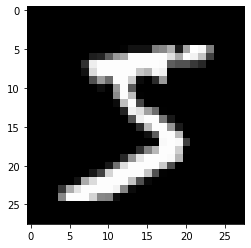

This is a handwritten number  5
Shape of input matrix:  (60000, 28, 28)


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

image_nr = 0
plt.imshow(train_images[image_nr], cmap='gray', vmin=0, vmax=255)
plt.show()
print('This is a handwritten number ', train_labels[image_nr])

print('Shape of input matrix: ', train_images.shape)

#### Question 1: The 'shape' of the matrix is (60000, 28, 28). What do each of these numbers mean?

#### Answer 1: 60000 is 60000 images, 28 and 28 are the height and width of the image (image dimensions)

Our workflow will be as follows: first we will present our neural network with the training data, train_images, and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [48]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as "transforming" your data. Some  data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully  representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple (or sometimes more complex) layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 2: Search internet and keras help to understand what "softmax" is doing. Can you explain why it is a popular choice for mutlti-class classification problems?
#### Question 3: Could you explain why we use 'relu' in first layer and 'softmax' in the second layer? A friend tells you that 'tanh' can be a good activation function. To try it out, would you replace 'relu', 'softmax' or both? Justify your answer.

#### Answer 3: Softmax is taking any amount of inputs and turning it into x final outputs, where x is the number of classes to choose from. All of these outputs add up to one (they are normalized), so you can tell when the model is 'confident' in a decision if it is much higher than the other values. These values can also be considered 'probabilities' that each classification is correct, making it easier to understand the output of the model.

#### Answer 4: If you replace the first 'relu' activation function with tanh, the accuracy doesn't change too much (doesn't change from relu, softmax accuracy of aroun 98%). This is because the effects from vanishing gradients isn't felt with this neural network. When changing the softmax activation function to tanh, the accuracy plummets to around 10%, which is possibly due to the output no longer being the highest number. Softmax gives probabilities, which is easier to train with our loss function, while tanh doesn't normalize or provide probabilities.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function. 'rmsprop' is specific type of the gradient descent algorithm. Keras offers a few versions of the optimizer.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [49]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 4: Search internet and keras documentation to understand 'categorical_crossentropy'. Could you explain why we use 'categorical_crossentropy' for loss function in this application?

#### Answer 4: Categorical crossentropy is used because we have 2 or more labels (more than binary crossentropy), and our labels are in one_hot representation. Categorical crossentropy uses the provided labels and the predicted label to find loss.

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [50]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [51]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn each digit into a one-hot vector of length 10.

In [52]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data. We can specify how many epoch of gradient descent are we using (how many passes through the whole data set) and what is the size of mini-batch for a single weigth update.

In [53]:
network.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 7ms/step - loss: 0.3894 - accuracy: 0.8904
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 0.1727 - accuracy: 0.9505
Epoch 3/10
120/120 [==============================] - 1s 7ms/step - loss: 0.1169 - accuracy: 0.9664
Epoch 4/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0874 - accuracy: 0.9744
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0677 - accuracy: 0.9809
Epoch 6/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0538 - accuracy: 0.9845
Epoch 7/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0434 - accuracy: 0.9873
Epoch 8/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0354 - accuracy: 0.9899
Epoch 9/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0281 - accuracy: 0.9928
Epoch 10/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0234 - accuracy: 0.9940

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an high accuracy (around 98%) on the training data. Now let's check that our model performs well on the test set too:

In [54]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 447us/step - loss: 0.0621 - accuracy: 0.9807


In [55]:
print('test_acc:', test_acc)

test_acc: 0.9807000160217285


Our test set accuracy will be a bit lower than the training set accuracy. 

#### Question 5: What will be an example of overfiting here?

#### Answer 5: If the train accuracy is much higher than the test accuracy. When last running this notebook, the train accuracy is 0.9883 and the test accuracy is 0.9800 (not much of a difference, little overfitting)

#### Question 6: Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

#### Answer 6: If I increase batch_size, the train and test accuracy seems to increase. This is the same with epochs, as epochs go up, the test and train accuracy rise as well. With 10 epochs and 32 batch size, the test accuracy was 98.019%. With 10 epochs and 64 batch size the test accuracy was the same. The higher the batch size, the faster the training of each epoch.

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Part 1:   Convolutional Neural Network (CNN) 

In this Part, we will learn how to train CNNs. CNNs are a very popular type of a neural network, particularly for data that come in a vector, matrix, or tensor (3 or higher dimensional array) form, such as sequences, images, and videos. The main innovation compared to the feedforward neural network, which relies on dense layers is a new type of a layer, called the convolutional layer. A neuron (called the filter) in CNN is a small vector, matrix (e.g., size 3x3 or 5x5) or a tensor that scans the input vector, matrix, or a tensor and produces a new vector, matrix, or a tensor. You can decide to use many such neurons in each convolutional layer.

In additon to the convolutional layer, CNNs also inroduce 'MaxPooling' layer which scans a block of an input matrix and finds the maximum value within each block. An outcome of this operation is reduction of the matrix size. Finally, CNNs also use the 'Flatten' operation which vectorizes the input matrix (e.g., converts a 10x10 input matrix into a vector of size 100). After the 'Flatten" operation CNNs typically add one or more dense layers.

For more details about CNN, please consult this blog: 
 https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [56]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam

The following block selects a subset of images from the MNIST data.

In [57]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 10000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

#### Question 1: Write some code ito check how many 'sevens' and how many 'not_sevens' there are in our training data? What is the accuracy of a classifier that always predicts that the input is not a seven?

In [58]:
# Answer 1:
num_7 = (y_train == 7).sum()
num_not_7 = (y_train != 7).sum()
accuracy = num_not_7/(num_not_7+num_7)
print(f'{num_7=} {num_not_7=} {accuracy=}')

num_7=6265 num_not_7=10000 accuracy=0.6148170919151552


The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [59]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [60]:
# -- Initializing the values for the convolution neural network

nb_epoch = 2  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(lr=0.0002, amsgrad=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [61]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 386
Trainable params: 386
Non-trainable params: 0
________________________________________________________

#### Question 2: From the above summary, can you explain the architecture of this CNN?

#### Answer 2: The input goes directly to a 2d convolution layer with shape (, 26, 26, 32), and it has 320 parameters. Then, each connection is put through an activation function. After this, the neural network is max pooled into shape (, 1, 1, 32). Then, the layers are flattened, which removes additional dimensions. Finally, the last 32 modes are densed into 2 nodes, which are then put through softmax activation. This provides the correct output for our purposes (binary classification).

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [64]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=10, verbose=1, 
                 validation_data=(X_test, Y_test))

Epoch 1/10
255/255 [==============================] - 2s 7ms/step - loss: 0.6635 - accuracy: 0.6148 - val_loss: 0.5204 - val_accuracy: 0.8972
Epoch 2/10
255/255 [==============================] - 2s 7ms/step - loss: 0.6460 - accuracy: 0.6148 - val_loss: 0.5127 - val_accuracy: 0.8972
Epoch 3/10
255/255 [==============================] - 2s 7ms/step - loss: 0.6300 - accuracy: 0.6148 - val_loss: 0.4863 - val_accuracy: 0.8972
Epoch 4/10
255/255 [==============================] - 2s 7ms/step - loss: 0.6132 - accuracy: 0.6171 - val_loss: 0.4909 - val_accuracy: 0.8988
Epoch 5/10
255/255 [==============================] - 2s 7ms/step - loss: 0.5945 - accuracy: 0.6459 - val_loss: 0.4837 - val_accuracy: 0.9130
Epoch 6/10
255/255 [==============================] - 2s 7ms/step - loss: 0.5739 - accuracy: 0.7014 - val_loss: 0.4479 - val_accuracy: 0.9171
Epoch 7/10
255/255 [==============================] - 2s 7ms/step - loss: 0.5524 - accuracy: 0.7487 - val_loss: 0.4397 - val_accuracy: 0.9239
Epoch 

Let us plot the accuracy. 

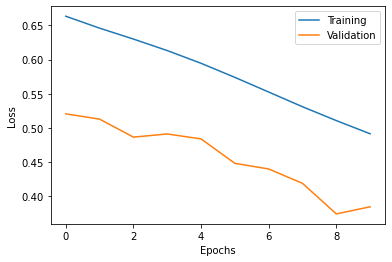

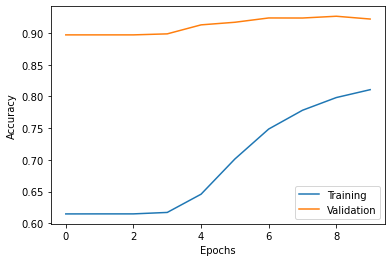

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [66]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.3842177987098694
Test Accuracy: 0.9222000241279602


Let us visualize our model Predictions!

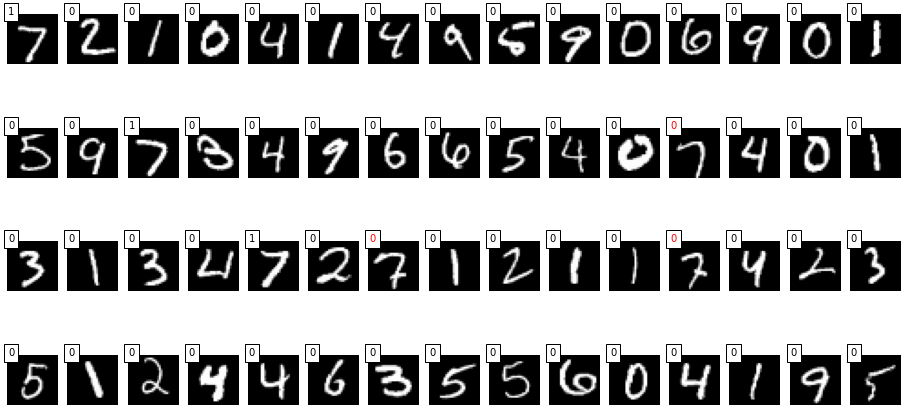

In [67]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

show_results(model)

#### Question 3: Can you discuss the performance of the CNN model? What kind of errors is it making?

#### Answer 3: The model is only guessing 0, as it still gets a high accuracy by doing so due to the 'uneven' spread of data (there are not many 7s). The test accuracy is high (around 90%) due to the low number of 7s in the dataset.

#### Question 4: Go back to step 0, change number of epochs to 10 and run it again. How did it impact the accuracy?

#### Answer 4: This increased the accuracy. The accuracy after 10 epochs was 0.9309999942779541, and the model started to predict some 7's correctly, instead of predicting not 7 for all of them.

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture. We will train it for only 5 epochs to save time.

In [25]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                86544     
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 3s 10ms/step - loss: 0.1084 - accuracy: 0.9624 - val_loss: 0.0565 - val_accuracy: 0.9826
Epoch 2/5
255/255 [==============================] - 3s 10ms/step - loss: 0.0674 - accuracy: 0.9772 - val_loss: 0.0414 - val_accuracy: 0.9876
Epoch 3/5
255/255 [==============================] - 3s 10ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0425 - val_accuracy: 0.9866
Epoch 4/5
255/255 [==============================] - 3s 10ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 5/5
255/255 [==============================] - 3s 10ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0376 - val_accuracy: 0.9876


In [28]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.03760790079832077
Test accuracy: 0.9876000285148621


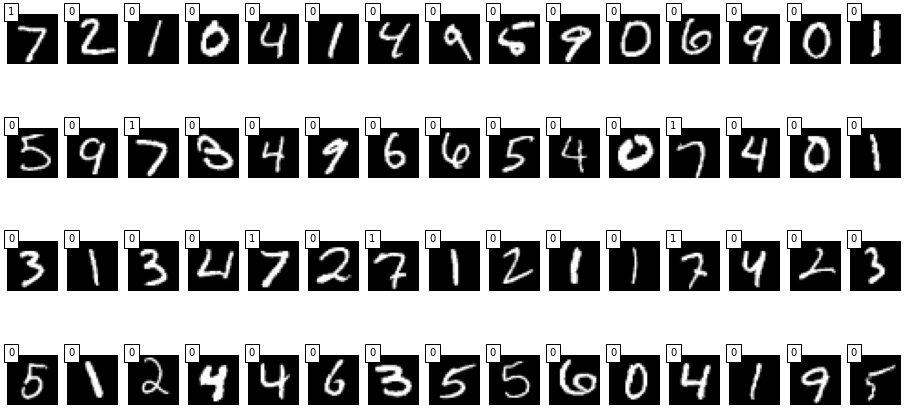

In [29]:
show_results(model)

#### Question 5: Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

#### Answer 5: This neural network has more dense layers, as well as less pooling. The last neural network most likely lost a lot of information about the images with it's max pooling layer, where this NN keeps half of the neurons when pooling, instead of pooling them all the way down to 1. This NN performed better, getting a validation accuracy of 98.73%, getting most of the 7s, as well as not-7s.

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [30]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 4s 15ms/step - loss: 0.1206 - accuracy: 0.9558 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 2/5
255/255 [==============================] - 4s 15ms/step - loss: 0.0634 - accuracy: 0.9793 - val_loss: 0.0375 - val_accuracy: 0.9886
Epoch 3/5
255/255 [==============================] - 4s 15ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 4/5
255/255 [==============================] - 4s 15ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0373 - val_accuracy: 0.9883
Epoch 5/5
255/255 [==============================] - 4s 15ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0344 - val_accuracy: 0.9890


In [33]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.03441617265343666
Test accuracy: 0.9890000224113464


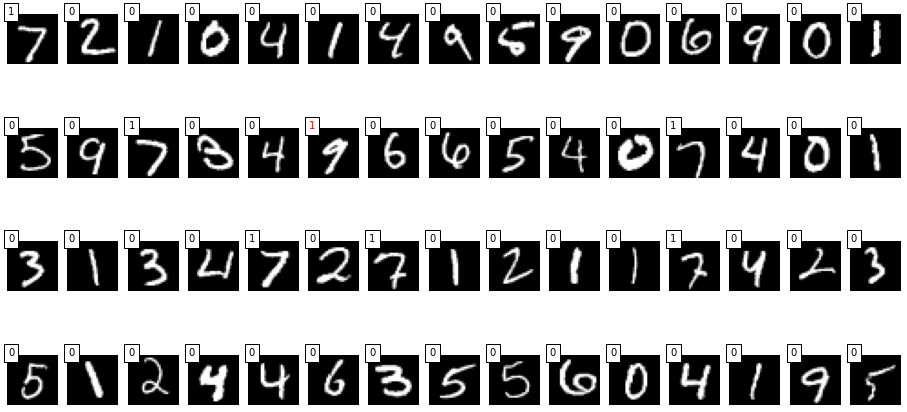

In [34]:
show_results(model)

Another small improvement.

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments. Try to get the best performance with only 2 training epochs!


In [35]:
nb_epoch = 2

In [36]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)
    return(score, accuracy)

An example of running this function

Epoch 1/2
255/255 [==============================] - 4s 14ms/step - loss: 0.3197 - accuracy: 0.8852 - val_loss: 0.1511 - val_accuracy: 0.9615
Epoch 2/2
255/255 [==============================] - 4s 14ms/step - loss: 0.1655 - accuracy: 0.9412 - val_loss: 0.0945 - val_accuracy: 0.9745
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.09454899281263351
Test accuracy: 0.9745000004768372


(0.09454899281263351, 0.9745000004768372)

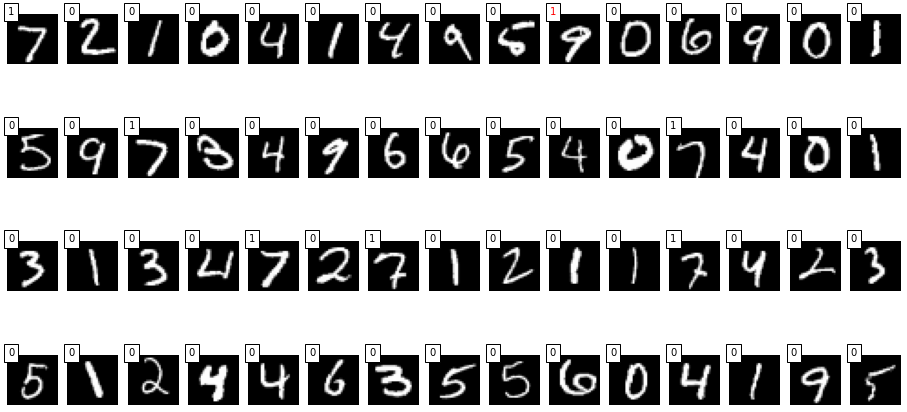

In [37]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Epoch 1/2
255/255 [==============================] - 13s 50ms/step - loss: 0.5002 - accuracy: 0.7332 - val_loss: 0.1183 - val_accuracy: 0.9658
Epoch 2/2
255/255 [==============================] - 12s 49ms/step - loss: 0.1599 - accuracy: 0.9433 - val_loss: 0.0879 - val_accuracy: 0.9713
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.08789907395839691
Test accuracy: 0.9713000059127808


(0.08789907395839691, 0.9713000059127808)

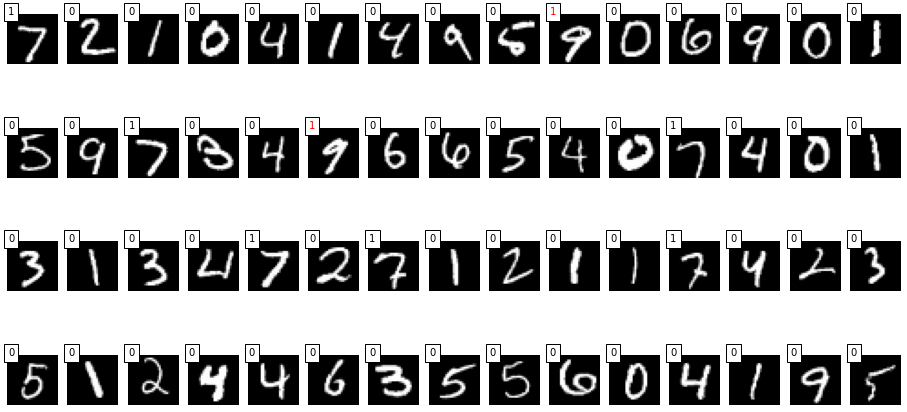

In [38]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

Epoch 1/2
255/255 [==============================] - 4s 15ms/step - loss: 0.3309 - accuracy: 0.8891 - val_loss: 0.1359 - val_accuracy: 0.9686
Epoch 2/2
255/255 [==============================] - 4s 15ms/step - loss: 0.1634 - accuracy: 0.9411 - val_loss: 0.1050 - val_accuracy: 0.9708
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.10496734827756882
Test accuracy: 0.97079998254776
8.83 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


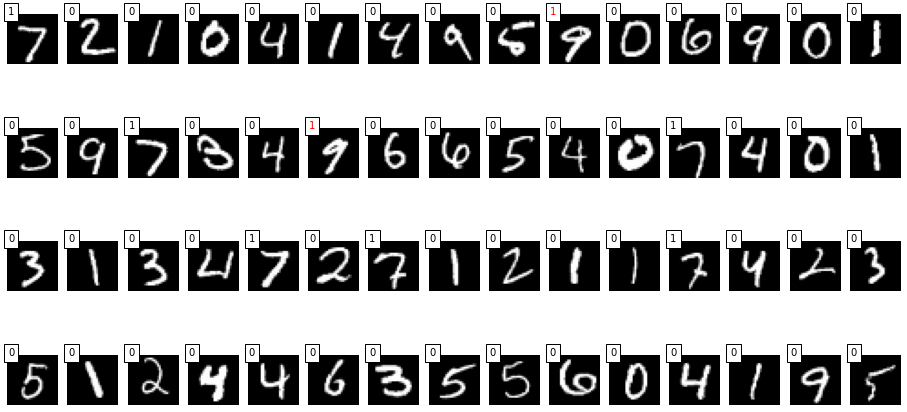

In [39]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

#### Question 6: Try to change some of the **hyperparameters** without exploding the computational resources on your computer and only using 2 training epochs. 
What is the best accuracy you can get? How many trainable parameters does your model have? How long does the training take?

In [ ]:
results = []
for i in range(5):
    for j in range(5):
        results.append((build_model(num_conv=i, num_dense=j), i, j))

In [42]:
results

[((0.09748759865760803, 0.973800003528595), 0, 0),
 ((0.11917984485626221, 0.9629999995231628), 0, 1),
 ((0.09511704742908478, 0.9700000286102295), 0, 2),
 ((0.07010868191719055, 0.9800999760627747), 0, 3),
 ((0.0886179655790329, 0.9706000089645386), 0, 4),
 ((0.0970173105597496, 0.9729999899864197), 1, 0),
 ((0.10729020833969116, 0.9696999788284302), 1, 1),
 ((0.10198571532964706, 0.9668999910354614), 1, 2),
 ((0.08696170896291733, 0.9714999794960022), 1, 3),
 ((0.13378383219242096, 0.9502000212669373), 1, 4),
 ((0.08906050771474838, 0.9735000133514404), 2, 0),
 ((0.087234266102314, 0.9742000102996826), 2, 1),
 ((0.11458420753479004, 0.9595000147819519), 2, 2),
 ((0.07745374739170074, 0.9753999710083008), 2, 3),
 ((0.07693082094192505, 0.9767000079154968), 2, 4),
 ((0.07120346277952194, 0.9797999858856201), 3, 0),
 ((0.10048318654298782, 0.96670001745224), 3, 1),
 ((0.08115930110216141, 0.9728999733924866), 3, 2),
 ((0.06754926592111588, 0.9782999753952026), 3, 3),
 ((0.06740064918994

## Answer 6: After running all combinations of num_conv and num_dense from 0 to 4, the best hyperparameters with 2 epochs seems to be 4 convolution layers and 4 dense layers (validation accuracy of 0.9807). However, there seems to be no reason for this, and I believe it is up to chance whether the validation accuracy is good with these changing hyperparameters, as there are only 2 epochs. Also, I cannot seem to find how weights are initialized, but if they are random, it would make sense that in 2 epochs there aren't large fluctuations in accuracy with small hyperparameter changes.

#### Question 7 (20% of the grade)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [75]:
import random

In [76]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [77]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [78]:
x, y, = [], []
train = np.array(random.sample([(x, y) for x, y in zip(X_train, Y_train)], 20000))
for image, label in train:
    x.append(image)
    y.append(label)
X_train = np.array(x)
Y_train = np.array(y)

In [79]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def new_build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for _ in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=20,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)
    return(score, accuracy)

Epoch 1/20
313/313 [==============================] - 21s 66ms/step - loss: 2.2907 - accuracy: 0.1681 - val_loss: 2.2397 - val_accuracy: 0.4353
Epoch 2/20
313/313 [==============================] - 21s 67ms/step - loss: 1.2918 - accuracy: 0.5803 - val_loss: 0.4387 - val_accuracy: 0.8690
Epoch 3/20
313/313 [==============================] - 21s 68ms/step - loss: 0.5213 - accuracy: 0.8364 - val_loss: 0.2894 - val_accuracy: 0.9158
Epoch 4/20
313/313 [==============================] - 21s 67ms/step - loss: 0.3688 - accuracy: 0.8845 - val_loss: 0.2109 - val_accuracy: 0.9374
Epoch 5/20
313/313 [==============================] - 21s 69ms/step - loss: 0.2869 - accuracy: 0.9098 - val_loss: 0.1630 - val_accuracy: 0.9500
Epoch 6/20
313/313 [==============================] - 21s 67ms/step - loss: 0.2296 - accuracy: 0.9287 - val_loss: 0.1421 - val_accuracy: 0.9585
Epoch 7/20
313/313 [==============================] - 21s 68ms/step - loss: 0.1985 - accuracy: 0.9395 - val_loss: 0.1180 - val_accuracy:

(0.05419746786355972, 0.9819999933242798)

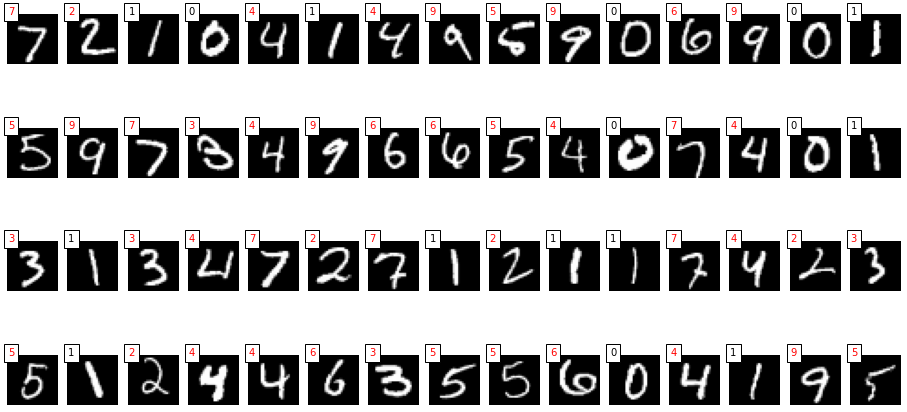

In [80]:
new_build_model(num_conv=4, num_dense=4)

#### Answer 7: When guessing all of the numbers with 4 convolution layers, 4 dense layers, and 10 epochs, the accuracy is 0.98199, which is pretty high! The image has the wrong coloring (red numbers do not mean wrong predictions), but looking at the image, it seems all of the guessed numbers are correct.

#### Question 8 (40% of the grade) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [161]:
"""import pickle
x_test = pickle.load(open(r'C:\Users\Josh\Documents\GitHub\machine-learning\hw6\xtest.pkl', 'rb'))
x_train = pickle.load(open(r'C:\Users\Josh\Documents\GitHub\machine-learning\hw6\xtrain.pkl', 'rb'))
y_test = pickle.load(open(r'C:\Users\Josh\Documents\GitHub\machine-learning\hw6\ytest.pkl', 'rb'))
y_train = pickle.load(open(r'C:\Users\Josh\Documents\GitHub\machine-learning\hw6\ytrain.pkl', 'rb'))"""

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [162]:
y_train.shape

(50000, 1)

In [163]:
from keras import backend as K

img_rows, img_cols = 32, 32
X_test_orig = x_test
if K.image_data_format() == 'channels_first':
    shape_ord = (3, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 3)

# Normalize the images:

x_train = x_train.reshape((x_train.shape[0],) + shape_ord)
x_test = x_test.reshape((x_test.shape[0],) + shape_ord)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Converting the classes to its binary categorical form
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [164]:
import random
X, Y, = [], []
train = np.array(random.sample([(x, y) for x, y in zip(x_train, y_train)], 20000))
for image, label in train:
    X.append(image)
    Y.append(label)
x_train = np.array(X)
y_train = np.array(Y)

In [165]:
x_train.shape

(20000, 32, 32, 3)

In [166]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(x_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

In [167]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def newer_build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for _ in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=batch_size, 
              epochs=20,verbose=1,
              validation_data=(x_test, y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)
    return(score, accuracy)

Epoch 1/20
313/313 [==============================] - 15s 46ms/step - loss: 2.2553 - accuracy: 0.1490 - val_loss: 2.1048 - val_accuracy: 0.2238
Epoch 2/20
313/313 [==============================] - 15s 46ms/step - loss: 2.0536 - accuracy: 0.2424 - val_loss: 1.9742 - val_accuracy: 0.2875
Epoch 3/20
313/313 [==============================] - 15s 47ms/step - loss: 1.9526 - accuracy: 0.2909 - val_loss: 1.8748 - val_accuracy: 0.3320
Epoch 4/20
313/313 [==============================] - 15s 47ms/step - loss: 1.8632 - accuracy: 0.3323 - val_loss: 1.7611 - val_accuracy: 0.3784
Epoch 5/20
313/313 [==============================] - 15s 47ms/step - loss: 1.7724 - accuracy: 0.3581 - val_loss: 1.7241 - val_accuracy: 0.3916
Epoch 6/20
313/313 [==============================] - 15s 49ms/step - loss: 1.6968 - accuracy: 0.3913 - val_loss: 1.5855 - val_accuracy: 0.4251
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 1.6285 - accuracy: 0.4104 - val_loss: 1.5392 - val_accuracy:

(1.245032787322998, 0.5583000183105469)

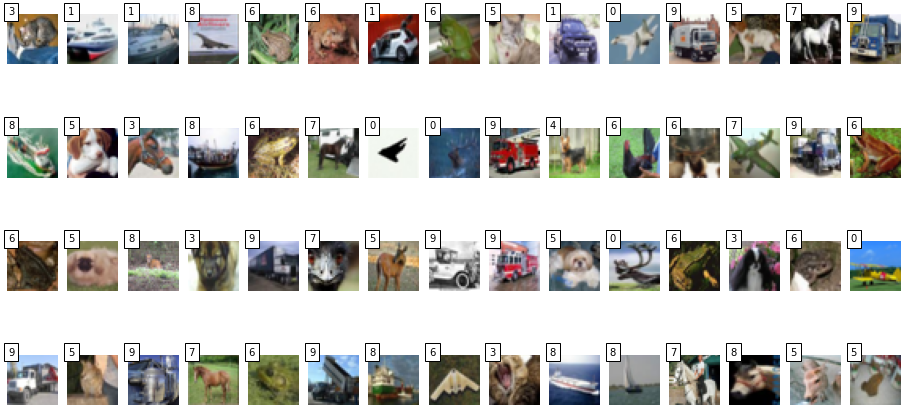

In [168]:
newer_build_model(num_conv = 2, num_dense = 3)

#### Answer 8: 2 convolution layers and 3 dense layers, the validation accuracy after 20 epochs was 0.5583000183105469.